# Práctica 0 - Introducción a Python, Matplotlib y Numpy

#### Ricardo Ruiz Fernández de Alba

In [1]:
# Importamos las bibliotecas necesarias

import numpy as np 
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from matplotlib import cm


## Ejercicio 1

- Leer la base de datos de Iris que hay en scikit-learn. V ́ease https://scikit-learn.org/stable/
datasets/toy dataset.html. El conjunto de datos de flor Iris, introducido por Ronald
Fisher en 1936, es clásico en aprendizaje autom ́atico.

In [2]:
# Leemos la base de datos de Iris

iris = load_iris(as_frame=True)

- Obtener las características (datos de entrada X) y la clase (y).

In [3]:
df = iris.frame
df
# Alternativamente X, y = df.values, iris.target (Usaremos estos nombres explícitamente)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


- Quedarse con las características primera y tercera. Recuérdese que en Python los índices
comienzan en 0

In [4]:
# Filtramos la primera y tercera columna
df = df.iloc[:, [0,2]]
df

,sepal length (cm),petal length (cm)
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4
...,...,...
145,6.7,5.2
146,6.3,5.0
147,6.5,5.2
148,6.2,5.4


- Visualizar con un Scatter Plot los datos, coloreando cada clase con un color diferente e
indicando con una leyenda la clase a la que corresponde cada color. Más concretamente,
el resultado debe ser el que se muestra en la Figura 1. Esta es la única salida que
proporciona este ejercicio. No se debe mostrar ninguna otra informaci ́on por terminal

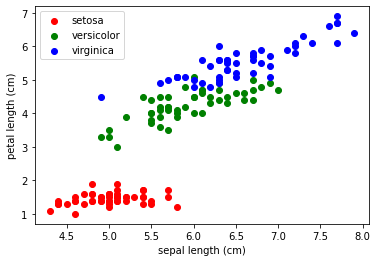

In [5]:
# Representamos la gráfica de puntos
fig, ax = plt.subplots(figsize=(6,4))

# Fijamos las etiquetas de los ejes
cols = df.columns.to_list() 
ax.set_xlabel(cols[0])
ax.set_ylabel(cols[1])

# Diccionario index-clase: color
colors = dict(enumerate(("red", "green", "blue")))

# Recorremos las diferentes clases y representamos
# cada una con su color correspondiente
for i, clsname in enumerate(iris.target_names):
    class_df = df[iris.target == i]
    x, y = class_df.iloc[:, 0], class_df.iloc[:, 1]
    ax.scatter(x, y, c=colors[i], label=clsname)

ax.legend()
plt.show()

## Ejercicio 2

- Separar en training (80 % de los datos) y test (20 %) aleatoriamente, conservando la proporción de elementos en cada clase tanto en training como en test. Con esto se pretende evitar que haya clases infrarepresentadas en entrenamiento o test. Con “aleatoriamente” nos referimos a que no sería válido escoger como conjunto de entrenamiento el 80 % inicial de ejemplos de cada clase y como conjunto de test el 20 % final. Es decir, los ejemplos deben desordenarse con respecto al orden original. En la implementación de este ejercici, no se puede recurrir a funciones como train test split de scikit-learn o similares.
- Se debe imprimir por terminal el número resultante de ejemplos de cada clase, tanto
en entrenamiento como en test, así como las clases de cada uno de los ejemplos de
entrenamiento y test. En la Figura 2 se muestra el tipo de salida que se espera obtener.

In [6]:
# Obtenemos el número de elementos de cada clase
nsetosa = np.count_nonzero(iris.target == 0)
nversicolor = np.count_nonzero(iris.target == 1)
nvirginica = np.count_nonzero(iris.target == 2)

# Diccionario que mapea numero de clase (0,1,2) con su número de elementos (50, 50, 50)
ncls = dict(enumerate((nsetosa, nversicolor, nvirginica)))

# Obtenemos muestra aleatoria (sin reemplazo) de 20% de índices de clase setosa
setosa_test = np.random.choice(range(nsetosa), size=int(0.2*nsetosa), replace=False)

# Obtenemos muestra aleatoria (sin reemplazo) de 20% de índices de clase versicolor
versicolor_range = range(nsetosa, nsetosa + nversicolor)
versicolor_test = np.random.choice(versicolor_range, size=int(0.2*nversicolor), replace=False)

# Obtenemos muestra aleatoria (sin reemplazo) de 20% de índices de clase virginica
virginica_range = range(nsetosa + nversicolor, len(df))
virginica_test = np.random.choice(virginica_range, size=int(0.2*nvirginica), replace=False)

# Concatenamos los índices para conformar el conjunto de test con las mismas proporciones de cada clase
test_indexes = np.concatenate((setosa_test, versicolor_test,  virginica_test))
np.random.shuffle(test_indexes)

# Obtenemos los índices de entrenamiento hallando la diferencia
indexes = set(range(len(df)))
training_indexes = list(indexes - set(test_indexes))
np.random.shuffle(training_indexes)

for i, clsname in enumerate(iris.target_names):
    print(f"--- Clase {clsname} ---")
    print(f"Ejemplos train:  {0.8 * ncls[i]:.0f}")
    print(f"Ejemplos test:  {0.2 * ncls[i]:.0f}")
    
# Imprimimos las clases de los elementos de entrenamiento
# Nota: si bien las clases son números enteros, lo imprimimos como
# tipo float para coincidir con la imagen del enunciado
print("Clase de los ejemplos de entrenamiento: ")
print(iris.target.filter(items=training_indexes, axis=0).astype(float).values)

print("Clase de los ejemplos test: ")
print(iris.target.filter(items=test_indexes, axis=0).astype(float).values)

--- Clase setosa ---
Ejemplos train:  40
Ejemplos test:  10
--- Clase versicolor ---
Ejemplos train:  40
Ejemplos test:  10
--- Clase virginica ---
Ejemplos train:  40
Ejemplos test:  10
Clase de los ejemplos de entrenamiento: 
[1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 1. 1. 0. 1. 0. 1. 2. 1. 2. 0. 2.
 0. 1. 1. 2. 2. 2. 2. 1. 0. 1. 1. 0. 1. 1. 0. 1. 0. 1. 2. 0. 0. 2. 0. 1.
 2. 1. 0. 1. 1. 1. 2. 2. 2. 2. 1. 1. 1. 0. 1. 2. 0. 2. 0. 1. 0. 2. 0. 2.
 2. 2. 1. 0. 0. 2. 2. 2. 1. 2. 0. 0. 0. 2. 0. 0. 2. 1. 1. 0. 0. 2. 0. 0.
 2. 2. 2. 2. 1. 2. 2. 0. 1. 1. 0. 0. 2. 2. 2. 0. 2. 0. 1. 2. 1. 0. 2. 2.]
Clase de los ejemplos test: 
[1. 2. 2. 2. 0. 0. 0. 0. 1. 2. 1. 0. 1. 2. 1. 2. 1. 0. 0. 0. 2. 0. 1. 2.
 1. 2. 1. 2. 1. 0.]


Se puede comprobar que efectivamente, se ha repartido el conjunto de $150$ elementos en uno de **entrenamiento** con 
$120$ y otro de **test** con $30$ elementos. Cada uno de los conjuntos está conformado por elementos de las 3 clases en la 
misma proporción ($1/3$) que la original. Así, habrá $10$ elementos setosa en test, $10$ elementos versicolor y $10$ elementos virginica; $40$ elementos setosa en train, $40$ elementos versicolor en train y $40$ elementos virginica en train.

## Ejercicio 3

- Obtener 100 valores equiespaciados entre $0$ y $4\pi$

In [7]:
x = np.linspace(0, 4*np.pi, num=100)

- Obtener el valor de:
    - $10^{−5}\cdot sinh(x)$
    - $cos(x)$
    - $tanh(2\cdot sin(x) − 4\cdot cos(x))$ 
    
para los $100$ valores anteriormente calculados.

In [8]:
y1 = 10**(-5) * np.sinh(x)
y2 = np.cos(x)
y3 = np.tanh(2*np.sin(x) - 4*np.cos(x))

- Visualizar las tres curvas simultáneamente en el mismo plot (con líneas discontinuas en verde, negro y rojo) e incluir la leyenda correspondiente. Más concretamente, el resultado debe ser el que se muestra en la Figura 3. Esta es la  ́unica salida que proporciona este ejercicio. No se debe mostrar ninguna otra información por terminal.

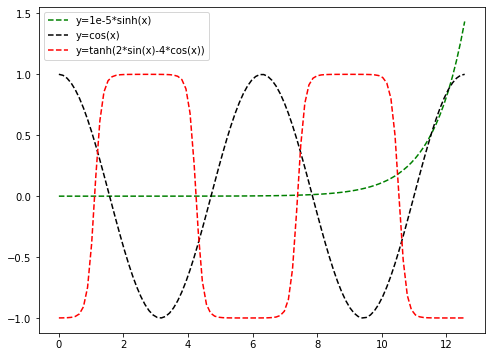

In [9]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(x, y1, "g--", label="y=1e-5*sinh(x)")
ax.plot(x, y2, "k--", label="y=cos(x)")
ax.plot(x, y3, "r--", label="y=tanh(2*sin(x)-4*cos(x))")

ax.legend()
plt.show()

## Ejercicio 4

Mostrar dos funciones 3D dentro de la misma figura. Las funciones a mostrar son las
siguientes:

- $f(x,y) = 1 - \lvert x+y \rvert - \lvert y-x \rvert$
- $f(x,y) = x\cdot y \cdot e^{-x^2 -y^2}$

Como se indicaba, ambas funciones deben mostrarse dentro de la misma figura/ventana
como surface plots. Más concretamente, el resultado debe ser exactamente el que se
muestra en la Figura 4 (tanto a nivel de título de las gráficas, como de rango de valores
en los ejes y colores empleados). Esta es la unica salida que proporciona este ejercicio.
No se debe mostrar ninguna otra información por terminal. El siguiente enlace puede
servir de ayuda y referencia a la hora de realizar este ejercicio: https://matplotlib.org/
stable/gallery/mplot3d/subplot3d.html. De cara a mostrar ecuaciones matemáticas en
figuras de Matplotlib usando LaTeX la siguiente referencia puede ser de utilidad: https://matplotlib.org/stable/gallery/text_labels_and_annotations/tex_demo.html.

Text(0.5, 0.92, '$x\\cdot y \\cdot e^{\\left(-x^2 - y^2\\right)}$')

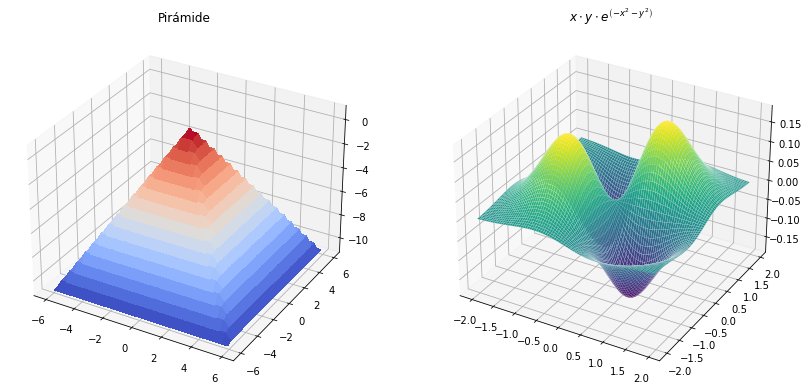

In [10]:
# Figura con doble de ancho que de largo
fig = plt.figure(figsize=(14, 12))

# -- Primer subplot --
ax = fig.add_subplot(1, 2, 1, projection='3d')


# Meshgrid y función 1
X = np.arange(-6, 6, 0.35)
Y = np.arange(-6, 6, 0.35)
X, Y = np.meshgrid(X, Y)
Z = 1 - np.abs(X+Y) - np.abs(Y-X)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm, antialiased=False, rstride=1, cstride=1, linewidth=0.01)

ax.set_title("Pirámide")

# -- Segundo subplot --
ax = fig.add_subplot(1, 2, 2, projection='3d')


# Meshgrid y función 2
X = np.arange(-2, 2, 0.05)
Y = np.arange(-2, 2, 0.05)
X, Y = np.meshgrid(X, Y)
Z = X * Y * np.exp(-X**2 - Y**2)

surf = ax.plot_surface(X, Y, Z, cmap="viridis", antialiased=True, rstride=1, cstride=1, linewidth=0.1, edgecolors='w')

ax.set_title(r"$x\cdot y \cdot e^{\left(-x^2 - y^2\right)}$")